In [1]:
%load_ext autoreload
%autoreload 2


import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct

import matplotlib.pyplot as plt

logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)

# CStree from Figure 1 in (Duarte & Solus, 2022)


DEBUG:matplotlib:CACHEDIR=/home/f/l/flrios/.cache/matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from /home/f/l/flrios/.cache/matplotlib/fontlist-v330.json


DEBUG:root:getting csirels per level
DEBUG:root:{0: [<cstrees.cstree.Stage object at 0x7efd719ff580>, <cstrees.cstree.Stage object at 0x7efd72bc2b80>], 1: [<cstrees.cstree.Stage object at 0x7efd72bc2e80>, <cstrees.cstree.Stage object at 0x7efd72bc2400>], 2: [], -1: [<cstrees.cstree.Stage object at 0x7efd72bc2ee0>]}
DEBUG:root:rels
DEBUG:root:{0: [<cstrees.cstree.CSI_relation object at 0x7efd70ec78e0>, <cstrees.cstree.CSI_relation object at 0x7efd70ec7f70>], 1: [<cstrees.cstree.CSI_relation object at 0x7efd719768b0>, <cstrees.cstree.CSI_relation object at 0x7efd71976a30>], 2: [], -1: [<cstrees.cstree.CSI_relation object at 0x7efd719760a0>]}
DEBUG:root: ⊥  X1, X0=0
DEBUG:root: ⊥  X1, X0=1
DEBUG:root:X0 ⊥  X2, X1=0
DEBUG:root:X0 ⊥  X2, X1=1
DEBUG:root: ⊥  X0
DEBUG:root:###### paired_csis
DEBUG:root:[{}, {(0, 2): [[None, {0}, None], [None, {1}, None]]}, {}, {}]
DEBUG:root:
 ######### minl cslisist
DEBUG:root:
#### Level 0
DEBUG:root:
#### Level 1
DEBUG:root:
#### Iteration 1
DEBUG:root:lev

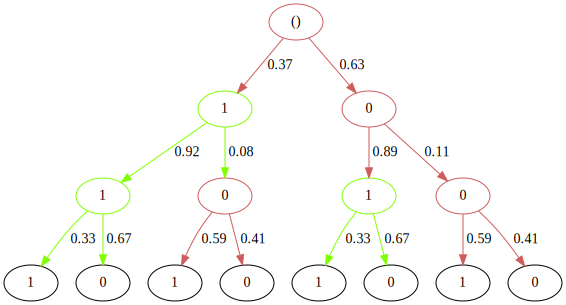

In [13]:
np.random.seed(5)
p = 3
cards = [2] * p
co = ct.CausalOrder(range(p))
tree = ct.CStree(co)
tree.set_cardinalities(cards)
#tree.set_stages({
#    -1: [ct.Stage([])],
 #   0: [ct.Stage([{0, 1}])],
 #   1: [ct.Stage([0,0]), ct.Stage([0,1]), ct.Stage([1,0]), ct.Stage([1,1])]})

tree.update_stages({
    0: [ct.Stage([0]),ct.Stage([1])],
    1: [ct.Stage([{0,1},0]), ct.Stage([{0,1},1])]})


tree.set_random_stage_parameters()
tree.create_tree()
tree.set_random_parameters()
a = tree.plot()

# a.draw("testplot.png")
x = tree.sample(2000)
a

true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
a


In [8]:
order = [0, 1, 2]
s1 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s1)

-3266.7673757353805


In [9]:
order = [0, 2, 1]
s2 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s2)

-3268.9944009209453


order: [0, 1, 2], score: -3266.7673757353805
order: [0, 2, 1], score: -3268.9944009209453
order: [1, 0, 2], score: -3266.7673757353796
order: [1, 2, 0], score: -3266.7673757353796
order: [2, 0, 1], score: -3268.9944009209453
order: [2, 1, 0], score: -3266.7673757353805
optimal order: [1, 0, 2], score -3266.7673757353796
max staging: ['[]']
max staging: ['[0]', '[1]']
max staging: ['[{0, 1}, 0]', '[{0, 1}, 1]']
stages :{0: [<cstrees.cstree.Stage object at 0x7efd71a07340>, <cstrees.cstree.Stage object at 0x7efdafbd1550>], 1: [<cstrees.cstree.Stage object at 0x7efd72bf1670>, <cstrees.cstree.Stage object at 0x7efdac350e50>], 2: [], -1: [<cstrees.cstree.Stage object at 0x7efd72bcfe50>]}
Level 0
[1] {1: 673, 0: 1117}
[0] {0: 156, 1: 54}
Level 1
[{0, 1}, 1] {1: 256, 0: 471}
[{0, 1}, 0] {1: 442, 0: 831}
Level 2
Level -1
[] {1: 1790, 0: 210}


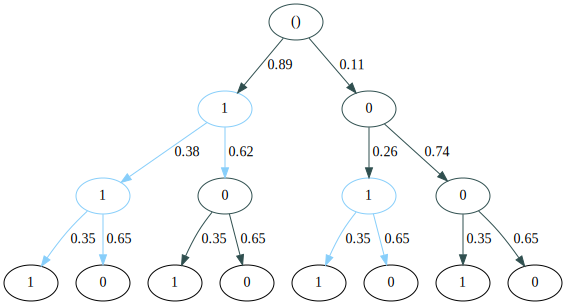

In [11]:
optord, score = ct.find_optimal_order(x, strategy="max", max_cvars=1, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()